In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input



In [ ]:
print("TF Version:", tf.__version__)


TF Version: 2.20.0


In [ ]:
# dataset directory
DATA_DIR = "animals"

# image size and training parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15
SEED = 42


In [ ]:
# data generator for training

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)



In [ ]:
# load training images
train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    seed=SEED
)


Found 4320 images belonging to 90 classes.


In [ ]:
# load validation images
val_gen = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    seed=SEED,
    shuffle=False
)

Found 1080 images belonging to 90 classes.


In [ ]:
num_classes = train_gen.num_classes
print("Classes:", num_classes)


Classes: 90


In [ ]:
base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze
# build cnn model
cnn = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 90)             │       115,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,373,274 (9.05 MB)

 Trainable params: 115,290 (450.35 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
cnn.fit(train_gen, validation_data=val_gen, epochs=EPOCHS)

Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 85s 618ms/step - accuracy: 0.4692 - loss: 2.3928 - val_accuracy: 0.7880 - val_loss: 0.9308
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 43s 318ms/step - accuracy: 0.8069 - loss: 0.7726 - val_accuracy: 0.8287 - val_loss: 0.6615
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 43s 321ms/step - accuracy: 0.8565 - loss: 0.5395 - val_accuracy: 0.8370 - val_loss: 0.5755
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - accuracy: 0.8954 - loss: 0.4030 - val_accuracy: 0.8574 - val_loss: 0.5141
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 298ms/step - accuracy: 0.9160 - loss: 0.3229 - val_accuracy: 0.8565 - val_loss: 0.4970
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 298ms/step - accuracy: 0.9227 - loss: 0.2890 - val_accuracy: 0.8593 - val_loss: 0.4920
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - accuracy: 0.9396 - loss: 0.2327 - val_accuracy: 0.8611 - val_loss: 0.4762
Epoch 8/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 294ms/step - accuracy: 0.9431 - loss: 0

In [ ]:
cnn.save("animal_cnn.keras")
print("Model saved")


Model saved


Testing image: animals\swan\9c409c11af.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


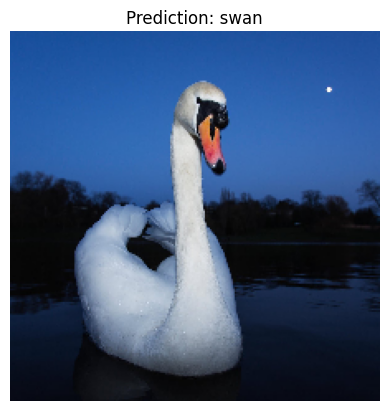

In [ ]:
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

# get all image paths and select random image for testing
all_images = glob.glob("animals/*/*.jpg")

test_img_path = random.choice(all_images)

print("Testing image:", test_img_path)

img = image.load_img(test_img_path, target_size=IMG_SIZE)
x = image.img_to_array(img)
x = preprocess_input(x)

x = np.expand_dims(x, axis=0)

pred = cnn.predict(x)
pred_class = np.argmax(pred[0])

labels = {v: k for k, v in train_gen.class_indices.items()}


# display image with prediction
plt.imshow(image.img_to_array(img).astype("uint8"))
plt.title(f"Prediction: {labels[pred_class]}")
plt.axis("off")
plt.show()

